In [1]:
import pandas as pd

In [2]:
train_data = pd.read_csv('./data/raw/train.csv')
train_data

,id,url_legal,license,excerpt,target,standard_error
0,c12129c31,NaN,NaN,When the young people returned to the ballroom...,-0.340259,0.464009
1,85aa80a4c,NaN,NaN,"All through dinner time, Mrs. Fayre was somewh...",-0.315372,0.480805
2,b69ac6792,NaN,NaN,"As Roger had predicted, the snow departed as q...",-0.580118,0.476676
3,dd1000b26,NaN,NaN,And outside before the palace a great garden w...,-1.054013,0.450007
4,37c1b32fb,NaN,NaN,Once upon a time there were Three Bears who li...,0.247197,0.510845
...,...,...,...,...,...,...
2829,25ca8f498,https://sites.ehe.osu.edu/beyondpenguins/files...,CC BY-SA 3.0,When you think of dinosaurs and where they liv...,1.711390,0.646900
2830,2c26db523,https://en.wikibooks.org/wiki/Wikijunior:The_E...,CC BY-SA 3.0,So what is a solid? Solids are usually hard be...,0.189476,0.535648
2831,cd19e2350,https://en.wikibooks.org/wiki/Wikijunior:The_E...,CC BY-SA 3.0,The second state of matter we will discuss is ...,0.255209,0.483866
2832,15e2e9e7a,https://en.wikibooks.org/wiki/Geometry_for_Ele...,CC BY-SA 3.0,Solids are shapes that you can actually touch....,-0.215279,0.514128


# EDA

<AxesSubplot:>

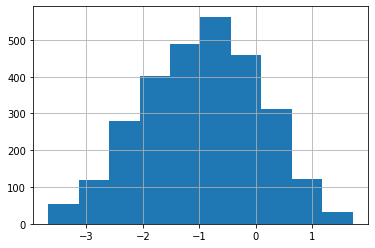

In [3]:
train_data['target'].hist()

<AxesSubplot:>

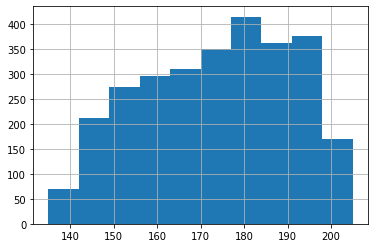

In [14]:
# just get a sense of token cnt. not accurate
train_data['token_cnt'] = train_data['excerpt'].apply(lambda x: len(x.replace('\n', ' ').split()))
train_data['token_cnt'].hist()

# try

In [19]:
from sklearn.model_selection import train_test_split
sub_data = train_data.sample(50)
sub_train_data, sub_test_data = train_test_split(sub_data, test_size=0.2)
print(len(sub_train_data), len(sub_test_data))

40 10


In [ ]:
import nlpaug.augmenter.word as naw

bt_aug = naw.BackTranslationAug()

In [ ]:
bt_augmented_text = bt_aug.augment(sub_train_data['excerpt'].tolist())

In [32]:
bt_aug_data = pd.DataFrame(bt_augmented_text, columns=['excerpt'])
for c in ['id', 'url_legal', 'license']:
    bt_aug_data[c] = ''

bt_aug_data['target'] = sub_train_data['target'].tolist()
bt_aug_data['standard_error'] = -1
bt_aug_data

,excerpt,id,url_legal,license,target,standard_error
0,Occasionally there would be a newspaper from U...,,,,-1.333635,-1
1,An undergraduate degree in history often serve...,,,,-0.605162,-1
2,When you think of dinosaurs and where they liv...,,,,1.711390,-1
3,The similarities and differences between the m...,,,,-1.120507,-1
4,A shepherd had a master who did not care for h...,,,,0.485115,-1
5,For a long time he lived in the toy cabinet or...,,,,0.288984,-1
6,"In June 1841, the first parliament of a united...",,,,-1.524661,-1
7,If you look at a picture of Claude Monet from ...,,,,-1.396892,-1
8,"As soon as the valve is tightened, the spring ...",,,,-2.944233,-1
9,"One afternoon, as the sun went down, a mother ...",,,,-0.726835,-1


In [27]:
import nlpaug.augmenter.word as naw

cwe_aug = naw.ContextualWordEmbsAug(model_path='bert-base-cased')

In [28]:
cwe_augmented_text = cwe_aug.augment(sub_train_data['excerpt'].tolist())

In [34]:
cwe_aug_data = pd.DataFrame(cwe_augmented_text, columns=['excerpt'])
for c in ['id', 'url_legal', 'license']:
    cwe_aug_data[c] = ''

cwe_aug_data['target'] = sub_train_data['target'].tolist()
cwe_aug_data['standard_error'] = -1
cwe_aug_data

,excerpt,id,url_legal,license,target,standard_error
0,Once in a while a newspaper came from Uncle Ob...,,,,-1.333635,-1
1,An undergraduate history degree is also used a...,,,,-0.605162,-1
2,When you think of dinosaurs and where they liv...,,,,1.711390,-1
3,The similarities and differences between the m...,,,,-1.120507,-1
4,A shepherd's dog had a master who took no care...,,,,0.485115,-1
5,For a long time he lived in the toy shed or on...,,,,0.288984,-1
6,"In June, 1841, the first Parliament of united ...",,,,-1.524661,-1
7,Whenever anybody looks at a picture by Claude ...,,,,-1.396892,-1
8,"As shortly as the power is attracted, the spri...",,,,-2.944233,-1
9,"One afternoon when the sun was going down, a m...",,,,-0.726835,-1


In [35]:
aug_train_data = pd.concat([sub_train_data, bt_aug_data, cwe_aug_data])
aug_train_data

,id,url_legal,license,excerpt,target,standard_error,token_cnt
173,344524c76,NaN,NaN,Once in a while a newspaper came from Uncle Ob...,-1.333635,0.492995,179.0
406,06e556039,https://en.wikipedia.org/wiki/Historian,CC BY-SA 3.0,An undergraduate history degree is often used ...,-0.605162,0.480271,165.0
2829,25ca8f498,https://sites.ehe.osu.edu/beyondpenguins/files...,CC BY-SA 3.0,When you think of dinosaurs and where they liv...,1.711390,0.646900,145.0
849,79e03e272,NaN,NaN,The similarities and differences between the m...,-1.120507,0.438242,192.0
1231,a5617616c,NaN,NaN,A shepherd's dog had a master who took no care...,0.485115,0.519269,177.0
...,...,...,...,...,...,...,...
35,,,,The mounds of earth here were known to cover s...,-2.500024,-1.000000,NaN
36,,,,"It is now a well established fact that matter,...",-2.115730,-1.000000,NaN
37,,,,Responding to stress in that way described bef...,-0.088543,-1.000000,NaN
38,,,,There were no playmates for Charley or Ruth's ...,0.247436,-1.000000,NaN
